In [46]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
(tr_i, tr_l), (ts_i, ts_l) = tf.keras.datasets.mnist.load_data()

In [38]:
df = pd.read_csv('/media/bhushan/Data/EDU/DL/Practicals/LP-IV-datasets/MNIST/mnist_train.csv')

In [57]:
train_images = df.drop(["label"], axis=1)
train_images = np.array(train_images).reshape(-1, 28, 28).astype("float")/255.0

train_images.shape

(60000, 28, 28)

In [51]:
tr_i = tr_i/255.0
ts_i = ts_i/255.0

In [52]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='softmax')
])

model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [53]:
history = model.fit(train_images, tr_l, epochs=5, validation_data=(ts_i, ts_l))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8954 - accuracy: 0.7636 - val_loss: 4.5264 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4113 - accuracy: 0.8826 - val_loss: 4.5006 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3443 - accuracy: 0.9015 - val_loss: 4.4801 - val_accuracy: 0.0892
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3051 - accuracy: 0.9145 - val_loss: 4.4557 - val_accuracy: 0.0892
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.9208 - val_loss: 4.4328 - val_accuracy: 0.0892


In [61]:
results = model.evaluate(ts_i, ts_l, verbose=2)

313/313 - 0s - loss: 4.4328 - accuracy: 0.0892 - 370ms/epoch - 1ms/step


In [62]:
history.history

{'loss': [0.8954242467880249,
  0.4113292992115021,
  0.3442584276199341,
  0.305144727230072,
  0.2754286229610443],
 'accuracy': [0.7636333107948303,
  0.8825666904449463,
  0.901533305644989,
  0.9144999980926514,
  0.9207833409309387],
 'val_loss': [4.526444911956787,
  4.500587463378906,
  4.480123996734619,
  4.455720901489258,
  4.43275785446167],
 'val_accuracy': [0.11349999904632568,
  0.11349999904632568,
  0.08919999748468399,
  0.08919999748468399,
  0.08919999748468399]}

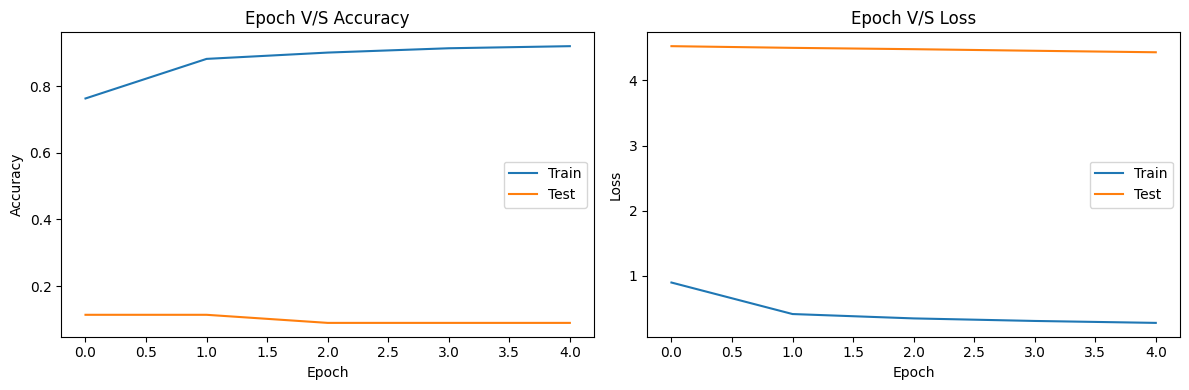

In [65]:

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Epoch V/S Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch V/S Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"])

plt.tight_layout()
plt.show()